<a href="https://colab.research.google.com/github/iamzhenxp/ML-in-Finance/blob/main/HW2_DongyangZhen_Markowiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/iamzhenxp/ML-in-Finance/main/monthly_factor_processed.csv")
data = data.drop(index=0,axis=0).reindex()
data['Date']=data['Date'].astype(str)
data['Month'] = data['Date'].str[-2:].astype(int)
data['Year'] = data['Date'].str[:4].astype(int)
data['MrMRf'] = data['Mkt']-data['Rf']
data['SMB'] = data['S']-data['B']
data['HML'] = data['H']-data['L']
data['UMD'] = data['U']-data['D']
data.head()

,Date,Mkt,Rf,S,B,H,L,U,D,Month,Year,MrMRf,SMB,HML,UMD
1,192608,2.81,0.25,2.44,3.69,5.37,1.12,NaN,NaN,8,1926,2.56,-1.25,4.25,NaN
2,192609,0.59,0.23,-1.05,0.33,-0.46,-0.68,NaN,NaN,9,1926,0.36,-1.38,0.22,NaN
3,192610,-3.11,0.32,-3.47,-3.27,-3.03,-3.74,NaN,NaN,10,1926,-3.43,-0.20,0.71,NaN
4,192611,2.75,0.31,2.82,3.16,2.70,3.09,NaN,NaN,11,1926,2.44,-0.34,-0.39,NaN
5,192612,3.05,0.28,2.44,2.51,2.48,2.59,NaN,NaN,12,1926,2.77,-0.07,-0.11,NaN


##2.1 Markowitz

In [3]:
mar_data = data[['Date','MrMRf','SMB','HML','UMD','U','D']]#.dropna()
portfolio = ['MrMRf','SMB','HML','UMD','U','D']
mar_data2 = mar_data.drop(columns='Date',axis=0)
mar_data2

,MrMRf,SMB,HML,UMD,U,D
1,2.56,-1.25,4.25,NaN,NaN,NaN
2,0.36,-1.38,0.22,NaN,NaN,NaN
3,-3.43,-0.20,0.71,NaN,NaN,NaN
4,2.44,-0.34,-0.39,NaN,NaN,NaN
5,2.77,-0.07,-0.11,NaN,NaN,NaN
...,...,...,...,...,...,...
997,3.19,-1.10,7.34,-8.88,0.94,9.82
998,4.52,2.86,0.58,-4.97,4.04,9.01
999,-2.84,-4.14,-1.70,2.65,-4.83,-7.48
1000,5.74,-3.12,-0.10,0.42,4.66,4.24


In [4]:
pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 3.6 MB/s 
     |████████████████████████████████| 2.8 MB 13.7 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [14]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(mar_data2,returns_data=True)
sample_cov

/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:88: UserWarning: Could not fix matrix. Please try a different risk model.
  "Could not fix matrix. Please try a different risk model.", UserWarning


,MrMRf,SMB,HML,UMD,U,D
MrMRf,7529.041213,1516.407103,1222.493187,-2309.732080,8101.472180,10411.204261
SMB,1516.407103,2647.463945,349.771215,-804.590420,2628.927770,3433.518190
HML,1222.493187,349.771215,3513.157956,-2429.137861,1027.416496,3456.554356
UMD,-2309.732080,-804.590420,-2429.137861,5895.027247,-825.649245,-6720.676492
U,8101.472180,2628.927770,1027.416496,-825.649245,9918.742093,10744.391338
D,10411.204261,3433.518190,3456.554356,-6720.676492,10744.391338,17465.067829


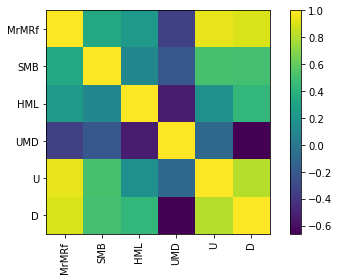

In [15]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

In [16]:
mu = mar_data2.mean()
mu

MrMRf    0.611459
SMB      0.248422
HML      0.346274
UMD      0.699598
U        1.428594
D        0.728996
dtype: float64

In [17]:
from pypfopt import EfficientFrontier
S = sample_cov
ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)
ef.max_sharpe()
weights = ef.clean_weights()

In [18]:
weights

OrderedDict([('MrMRf', 0.0),
             ('SMB', 0.0),
             ('HML', 0.36238),
             ('UMD', 0.38957),
             ('U', 0.24805),
             ('D', 0.0)])

In [19]:
ef.portfolio_performance(verbose=True);

Expected annual return: 75.2%
Annual volatility: 3613.3%
Sharpe Ratio: 0.02


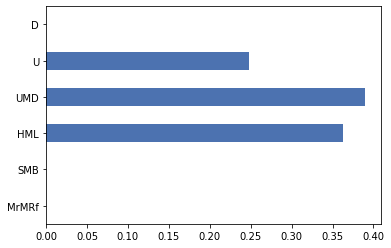

In [20]:
pd.Series(weights).plot.barh();